<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/To_Explore_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SampleSuperstore.csv to SampleSuperstore (2).csv
User uploaded file "SampleSuperstore.csv" with length 1113007 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(io.StringIO(uploaded['SampleSuperstore.csv'].decode('utf-8')))
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Analysing total profit of categories**

In [3]:
furniture_total_profit=df[df['Category']=='Furniture']['Profit']
office_total_profit=df[df['Category']=='Office Supplies']['Profit']
technology_total_profit=df[df['Category']=='Technology']['Profit']
print('Furniture total profit: ', sum(furniture_total_profit))
print('Office supplies total profit: ', sum(office_total_profit))
print('Technology total profit: ', sum(technology_total_profit))

Furniture total profit:  18451.2728
Office supplies total profit:  122490.80080000011
Technology total profit:  145454.9480999999


## **Analysing total Sales of categories**

In [4]:
furniture_total_sales=df[df['Category']=='Furniture']['Sales']
office_total_sales=df[df['Category']=='Office Supplies']['Sales']
technology_total_sales=df[df['Category']=='Technology']['Sales']
print('Furniture total sales: ', sum(furniture_total_sales))
print('Office supplies total sales: ', sum(office_total_sales))
print('Technology total sales: ', sum(technology_total_sales))

Furniture total sales:  741999.7952999998
Office supplies total sales:  719047.0320000029
Technology total sales:  836154.0329999966


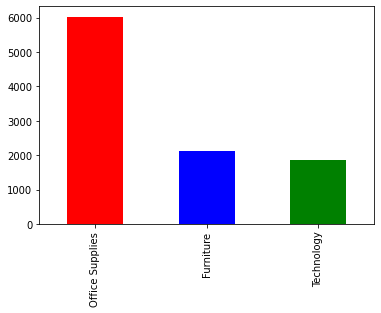

In [5]:
# Plotting Count of categories on graph 

count_categories=pd.value_counts(df['Category'])
count_categories.plot(kind='bar', color=['red','blue','green'])
plt.show()

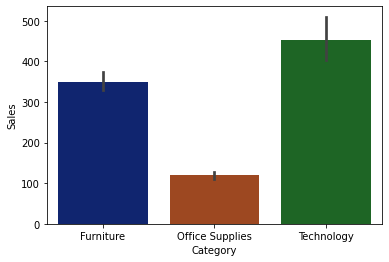

In [6]:
# Sales and category graph

import seaborn as sns
sns.barplot(x=df['Category'], y=df['Sales'], palette='dark')

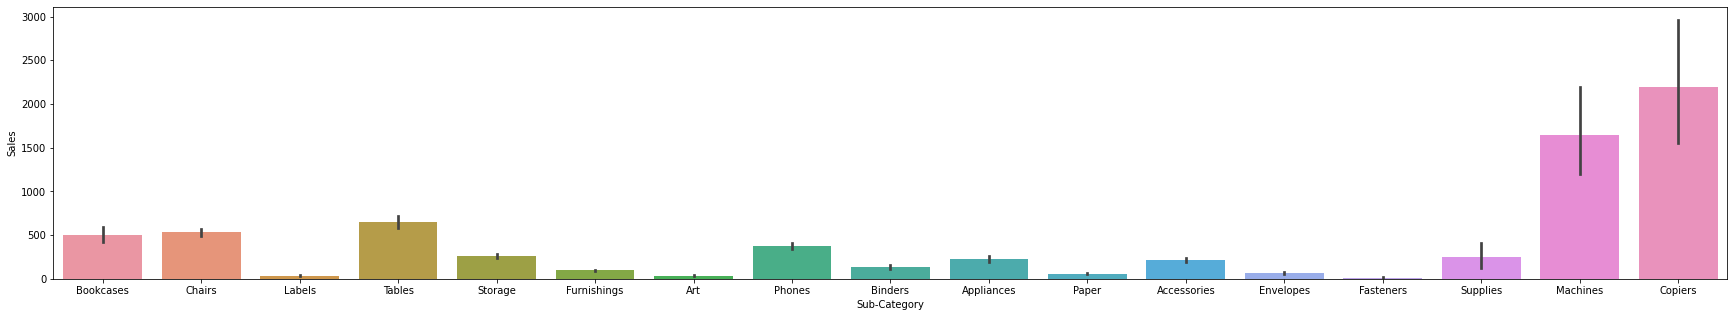

In [7]:
#Sales and subcategory graph

plt.figure(figsize=(30,5))
sns.barplot(x=df['Sub-Category'], y=df['Sales'])

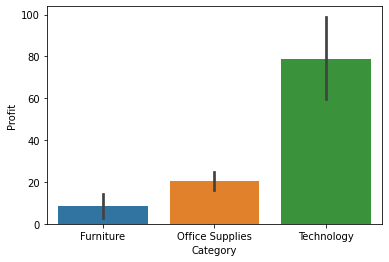

In [8]:
#Profit and category graph

sns.barplot(x=df['Category'], y=df['Profit'])

## **Which state of US has higher frequency?**

In [9]:
all_states=df['State'].unique()

state_sales=[]
for i in range(len(all_states)):
  b=df[df['State']==all_states[i]]['Sales']
  state_sales.append(sum(b))

res = {all_states[i]: state_sales[i] for i in range(len(all_states))} 
#res
max_value=max(res, key=res.get)
print(max_value)

California


## **What are the top 10 states with high sales?**

In [10]:
sorted_states=[]
for w in sorted(res, key=res.get, reverse=True):
    #print(w, res[w])
    sorted_states.append([w,res[w]])
for v in range(10):
  print(sorted_states[v])

['California', 457687.631500001]
['New York', 310876.2709999998]
['Texas', 170188.04580000005]
['Washington', 138641.26999999993]
['Pennsylvania', 116511.91400000003]
['Florida', 89473.708]
['Illinois', 80166.10099999985]
['Ohio', 78258.13599999993]
['Michigan', 76269.61400000002]
['Virginia', 70636.71999999999]


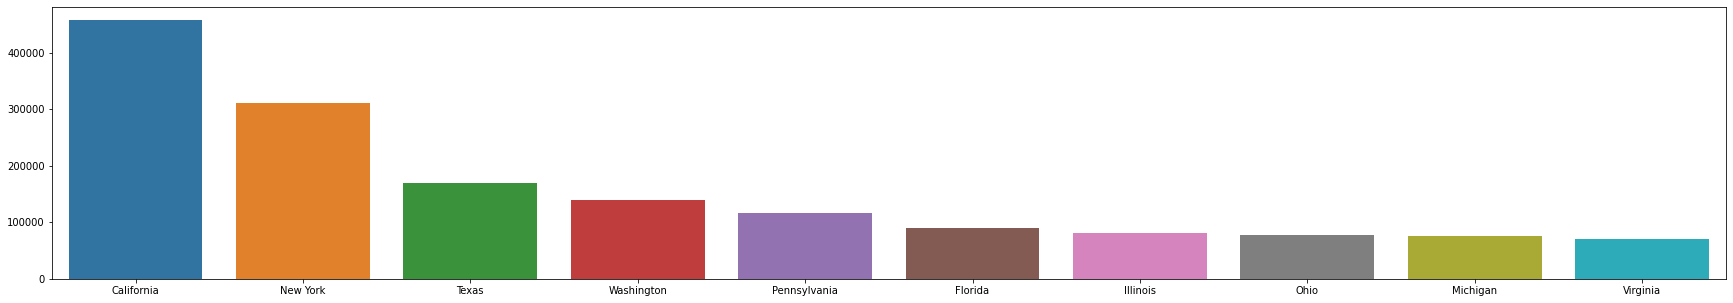

In [11]:
# FOR GRAPH PURPOSE
states=[]
all_state_sales=[]
for w in sorted(res, key=res.get, reverse=True):
  states.append(w)
  all_state_sales.append(res[w])

state10=[]
state_sales10=[]
for i in range(10):
  state10.append(states[i])
  state_sales10.append(all_state_sales[i])

plt.figure(figsize=(30,5))
sns.barplot(x=state10, y=state_sales10)

# **What are the top 20 cities with high sales?**

In [12]:
all_cities=df['City'].unique()

city_sales=[]
for j in range(len(all_cities)):
  a=df[df['City']==all_cities[j]]['Sales']
  city_sales.append(sum(a))

dict_of_city_sales={all_cities[k]: city_sales[k] for k in range(len(all_cities))} 
top_20_cities=[]
for z in sorted(dict_of_city_sales, key=dict_of_city_sales.get, reverse=True):
  top_20_cities.append([z, dict_of_city_sales[z]])

for city_value in range(20):
  print(top_20_cities[city_value])

['New York City', 256368.161]
['Los Angeles', 175851.341]
['Seattle', 119540.742]
['San Francisco', 112669.09199999993]
['Philadelphia', 109077.01300000008]
['Houston', 64504.76039999994]
['Chicago', 48539.54100000004]
['San Diego', 47521.028999999995]
['Jacksonville', 44713.183]
['Springfield', 43054.342000000004]
['Detroit', 42446.94400000002]
['Columbus', 38706.242999999995]
['Newark', 28576.118999999995]
['Columbia', 25283.324]
['Lafayette', 25036.199999999997]
['Jackson', 24963.857999999997]
['San Antonio', 21843.528]
['Burlington', 21668.081999999995]
['Arlington', 20214.532000000003]
['Dallas', 20131.932199999992]


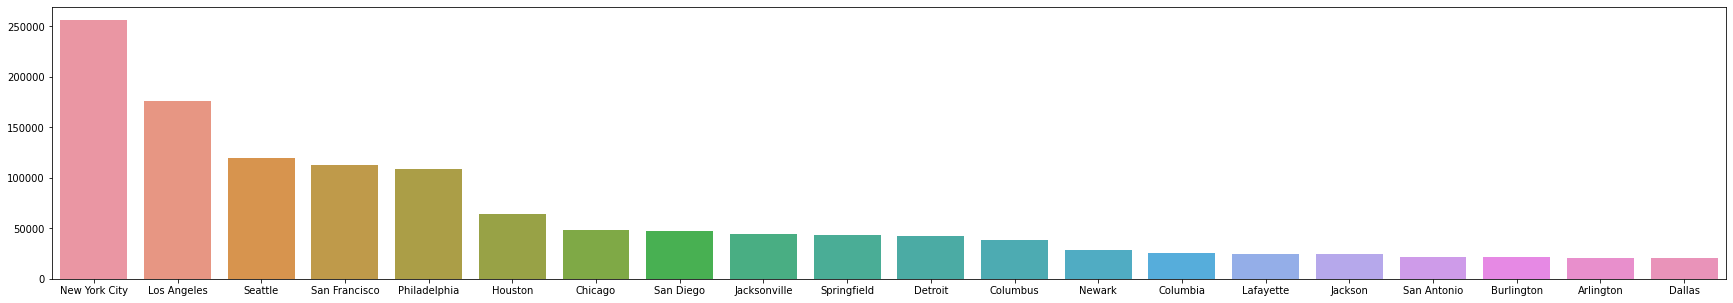

In [13]:
# FOR GRAPH PURPOSE
cities=[]
cities_sales=[]
for z in sorted(dict_of_city_sales, key=dict_of_city_sales.get, reverse=True):
  cities.append(z)
  cities_sales.append(dict_of_city_sales[z])

city20=[]
city_sales20=[]
for i in range(20):
  city20.append(cities[i])
  city_sales20.append(cities_sales[i])

plt.figure(figsize=(30,5))
sns.barplot(x=city20, y=city_sales20)

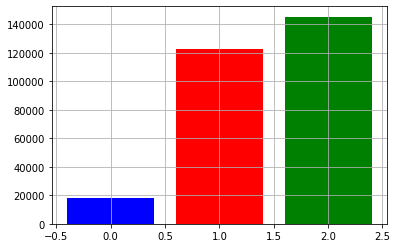

In [14]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
df['Category']=en1.fit_transform(df['Category'])
furniture_total_profit=df[df['Category']==0]['Profit']  # 0 represents furniture
office_total_profit=df[df['Category']==1]['Profit']  # 1 represents office supplies
technology_total_profit=df[df['Category']==2]['Profit']  # 2 represents technology
my_list=[sum(furniture_total_profit), sum(office_total_profit), sum(technology_total_profit)]
plt.bar([0,1,2], my_list, color=['blue','red','green'])
plt.grid()
plt.show()

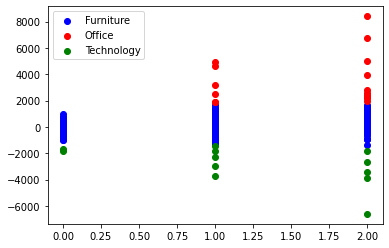

In [15]:
from sklearn.cluster import KMeans
x=df.iloc[:,[7,-1]].values
kmeans=KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300, random_state=0)
kmeans.fit(x)
y_pred=kmeans.predict(x)

plt.scatter(x[y_pred==0,0], x[y_pred==0,1], c='blue', label='Furniture')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], c='red', label='Office')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], c='green', label='Technology')
plt.legend()
plt.show()

Analysis shows that the weak area is of Category Furniture.

As per sales: Technology>Furniture>Office supplies

As per profit: Technology>Office supplies>Furniture

So, Furniture has more sales than Office supplies but profit is less. Therefore, this is the weak area where we have to work harder to make more profit.